# Intro to Machine Learning with Python
## What is Machine Learning?

> Machine learning teaches computers to do what comes naturally to humans: learn from experience. Machine learning algorithms use computational methods to “learn” information directly from data without relying on a predetermined equation as a model. The algorithms adaptively improve their performance as the number of samples available for learning increases.

### Reading

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

![](https://se.mathworks.com/help/stats/machinelearningtypes.jpg)

* Supervised learning — the input features and the output labels are defined.
* Unsupervised learning — the dataset is unlabeled and the goal is to discover hidden relationships.
* Reinforcement learning — some form of feedback loop is present and there is a need to optimize some parameter.

![](https://se.mathworks.com/help/stats/machinelearningoverviewworkflow.jpg)

![](http://2.bp.blogspot.com/-47gEptvJ_y0/UwEFEaermbI/AAAAAAAADlE/DdpDS2kqyRs/s1600/hds-sc-2014-6.jpg)

## Terminology

[Source](https://medium.com/technology-nineleaps/some-key-machine-learning-definitions-b524eb6cb48)

**Model**: A machine learning model can be a mathematical representation of a real-world process. To generate a machine learning model you will need to provide training data to a machine learning algorithm to learn from.

**Algorithm**: Machine Learning algorithm is the hypothesis set that is taken at the beginning before the training starts with real-world data. When we say Linear Regression algorithm, it means a set of functions that define similar characteristics as defined by Linear Regression and from those set of functions we will choose one function that fits the most by the training data.

**Training**: While training for machine learning, you pass an algorithm with training data. The learning algorithm finds patterns in the training data such that the input parameters correspond to the target. The output of the training process is a machine learning model which you can then use to make predictions. This process is also called “learning”.

**Regression**: Regression techniques are used when the output is real-valued based on continuous variables. For example, any time series data. This technique involves fitting a line.

**Classification**: In classification, you will need to categorize data into predefined classes. For example, an email can either be ‘spam’ or ‘not spam’.

**Target**: The target is whatever the output of the input variables. It could be the individual classes that the input variables maybe mapped to in case of a classification problem or the output value range in a regression problem. If the training set is considered then the target is the training output values that will be considered.

**Feature**: Features are individual independent variables that act as the input in your system. Prediction models use features to make predictions. New features can also be obtained from old features using a method known as ‘feature engineering’. More simply, you can consider one column of your data set to be one feature. Sometimes these are also called attributes. And the number of features are called dimensions.

**Label**: Labels are the final output. You can also consider the output classes to be the labels. When data scientists speak of labeled data, they mean groups of samples that have been tagged to one or more labels.

**Overfitting**: An important consideration in machine learning is how well the approximation of the target function that has been trained using training data, generalizes to new data. Generalization works best if the signal or the sample that is used as the training data has a high signal to noise ratio. If that is not the case, generalization would be poor and we will not get good predictions. A model is overfitting if it fits the training data too well and there is a poor generalization of new data.

**Regularization**: Regularization is the method to estimate a preferred complexity of the machine learning model so that the model generalizes and the over-fit/under-fit problem is avoided. This is done by adding a penalty on the different parameters of the model thereby reducing the freedom of the model.

**Parameter and Hyper-Parameter**: Parameters are configuration variables that can be thought to be internal to the model as they can be estimated from the training data. Algorithms have mechanisms to optimize parameters. On the other hand, hyperparameters cannot be estimated from the training data. Hyperparameters of a model are set and tuned depending on a combination of some heuristics and the experience and domain knowledge of the data scientist.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib import rc
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.metrics as sm
import sklearn.model_selection as ms
import pylab as pl
from ipywidgets import widgets, interact
from IPython.display import display, HTML

rc('figure', figsize=(16.0, 8.0))
sns.set(style="white")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 6})

## Linear regression

### Pearson correlation at a glance.

$$
r = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}
$$

> is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

### Correlation does not imply causation!

![](https://kaiserscience.files.wordpress.com/2015/01/global-average-temperature-versus-number-of-pirates.png?w=960)

[Source](https://kaiserscience.wordpress.com/physics/the-scientific-method/correlation-and-causation/)

> Linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression

$$
f(x) = a\cdot x + b + \epsilon
$$

Hyperplane equation in matrix form:
$$
f(X) = \beta^{T}{X}
$$

### Least squares method

![](https://cdn-images-1.medium.com/max/1800/1*j0Y73Gqu8shJ-xwd0dLzog.jpeg)

[Wikipedia](https://en.wikipedia.org/wiki/Least_squares)

In [2]:
boston = sd.load_boston()

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [4]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = boston.target
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_boston['target'].corr(df_boston['RM'])

0.69535994707153936

In [6]:
lr_mse = widgets.FloatText(description='MSE:')

def lr_plot(intercept, slope):
    df = df_boston.loc[:, ['target', 'RM']]
    df['residual_square'] = np.power(df['target'] - (df['RM'] * slope + intercept), 2)
    lr_mse.value = df['residual_square'].sum() / len(df['residual_square'])
    
    df = pd.melt(df, id_vars=['RM'], value_vars=['target', 'residual_square'])
       
    g = sns.FacetGrid(df, col="variable", size=6, sharey=False)
    g.map(plt.scatter, "RM", "value")
     
    ax = g.axes.flat
    ax[0].set(ylim=(min(0, df_boston['target'].min()), df_boston['target'].max() + 10));    
    xlims = np.array(ax[0].get_xlim())        

    ax[0].plot(xlims, intercept + slope *  xlims, color="black", ls="-", lw = 2.5)
    ax[1].plot(xlims, [0, 0], color='g', linestyle='-', lw = 2.5)
    
interact(lr_plot,
         intercept=widgets.IntSlider(min=-100, max=100, step=1, value=0),
         slope=widgets.IntSlider(min=0, max=50, step=1, value=0))

display(lr_mse)

A Jupyter Widget

A Jupyter Widget

### Least squares fit

$$
a = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad
b = \bar{y} - a\bar{x}\quad
$$
where
$$
S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})\quad \text{(covariance)} \\
\sigma{_x}^{2} = \sum_{i=1}^{n} (x_i - \bar{x})^2\quad \text{(variance)}	
$$

### Linear regression in Scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_boston[['RM']], df_boston['target'])

score = model.score(df_boston[['RM']], df_boston['target'])

print("R^2: {:.2f}, Slope: {:.2f}, Intercept: {:.2f}".format(score, model.coef_[0], model.intercept_))

R^2: 0.48, Slope: 9.10, Intercept: -34.67


We can't trust score because it's computed from train data.

### Train/Test split
>The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

* train = 80%
* test = 20%

In [8]:
for i in range(10):
    X_train, X_test, y_train, y_test = ms.train_test_split(df_boston[['RM']], df_boston['target'], test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    score = model.score(X_test[['RM']], y_test)

    print("R^2: {:.2f}, Slope: {:.2f}, Intercept: {:.2f}".format(score, model.coef_[0], model.intercept_))

R^2: 0.62, Slope: 8.86, Intercept: -33.01
R^2: 0.62, Slope: 8.71, Intercept: -32.15
R^2: 0.44, Slope: 8.98, Intercept: -33.62
R^2: 0.45, Slope: 8.98, Intercept: -33.97
R^2: 0.23, Slope: 9.85, Intercept: -39.49
R^2: 0.58, Slope: 8.83, Intercept: -32.81
R^2: 0.53, Slope: 8.67, Intercept: -32.22
R^2: 0.54, Slope: 8.69, Intercept: -32.10
R^2: 0.49, Slope: 9.02, Intercept: -34.30
R^2: 0.41, Slope: 9.22, Intercept: -35.44


### Cross validation (K-Folds)
![](https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png)

In [9]:
model = LinearRegression()

X = df_boston[['RM']]
y = df_boston['target']

shuffle = ms.KFold(n_splits=5, shuffle=True)
scores = ms.cross_val_score(model, X, y, cv=shuffle)

print("R^2: ", scores)
print("Mean R^2: {:.2f}".format(scores.mean()))

R^2:  [ 0.40068537  0.54731985  0.60076942  0.44602979  0.25795731]
Mean R^2: 0.45


### Train/Test/Validation split

[What is the difference between test set and validation set?](https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set)

```
A typical machine learning task can be visualized as the following nested loop:

while (error in validation set > X) {
    tune hyper-parameters
    while (error in training set > Y) {
        tune parameters
    }
}
Typically the outer loop is performed by human, on the validation set, and the inner loop by machine, on the training set. You then need a 3rd test set to assess the final performance of the model.

In other words, validation set is the training set for human.
```

[https://www.quora.com/What-are-hyperparameters-in-machine-learning](https://www.quora.com/What-are-hyperparameters-in-machine-learning)

> Hence, selecting the right hyperparameters is usually not an easy task. Two common ways are to do a grid search (create finite lists for possible hyperparameters and fit models to all combinations and pick the best performing model) or a random search (generate the hyperparameters randomly from some distribution, fit the model, and find the hyperparameters that optimize your overall score, precision, or some other metric).

Typical split:
* train = 60%
* test = 20%
* validation = 20%

### Multiple linear regression

$$
Y=X\beta+\epsilon
$$

In [10]:
model = LinearRegression()

X = df_boston.loc[:, df_boston.columns != 'target']
y = df_boston['target']

model.fit(X, y)

score = model.score(X, y)

print("R^2: {:.2f}".format(score))

R^2: 0.74


### Gradient descent

[A Brief Introduction To Gradient Descent](https://alykhantejani.github.io/a-brief-introduction-to-gradient-descent/)

MSE as function of slope & intercept.

(400, 2)


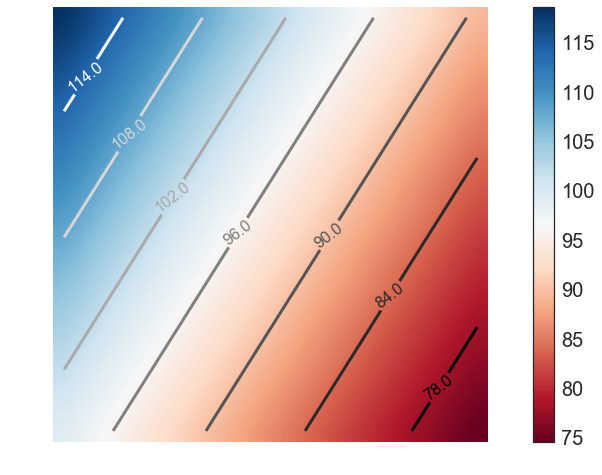

In [11]:
slope = 8.8
intercept = -39.8
    
grid = np.mgrid[(slope - 0.1):(slope + 0.1):0.01, (intercept - 1):(intercept + 1):0.1].reshape(2, -1).T

print(grid.shape)
rses = np.apply_along_axis(lambda p: sm.mean_squared_error(df_boston['RM'] * p[0] + p[1], df_boston['target']), 1, grid)

Z = rses.reshape(20, 20)

im = plt.imshow(Z, cmap=plt.cm.RdBu, interpolation='bicubic')
plt.axis('off')
cset = plt.contour(Z, linewidths=3, cmap=plt.cm.gray)
plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=16)
plt.colorbar(im)
plt.show()

$$
f(x) = mx + b
$$

* Define error (cost) function:
$$
E\left(m,b\right) = \frac{1}{N}\sum_{i=1}^{N}\big(y_i - f(x_i)\big)^2
$$

* Repeat until convergence (number of epochs or threshold reached)
$$
m_{j+1} = m_j - \gamma\frac{\partial E}{m_j} \\
			b_{j+1} = b_j - \gamma\frac{\partial E}{b_j} \\
$$

$$
\frac{\partial E}{m_j} = -\frac{2}{N}\sum_1^{N} x_i\big(y_i - f(x_i)\big) \\
\frac{\partial E}{b_j} = -\frac{2}{N}\sum_1^{N}\big(y_i - f(x_i)\big)
$$

#### GD Parameters

In [12]:
alpha = 0.025
epochs = 10000

![](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAA0oAAAAJDUzMTBlMDdjLWM0ZmMtNDJkNS1hODk3LTAzYTllMDUwZmY1OQ.jpg)

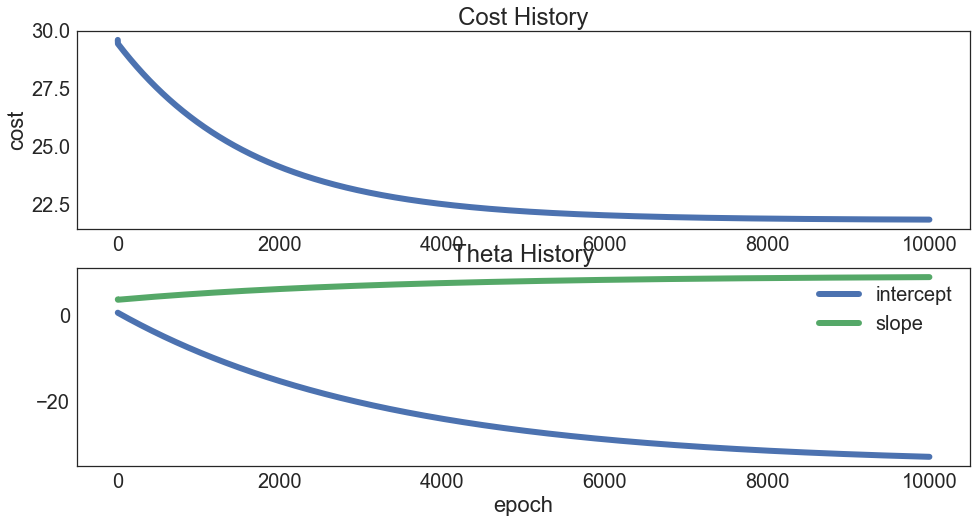

In [13]:
def compute_cost(X, y, theta):
    m = len(y)
    pred = X.dot(theta).flatten()
    return ((y - pred) ** 2).sum() / (2 * m)

def gradient_descent_step(X, y, theta, alpha):
    pred = X.dot(theta).flatten()
    errors = -np.sum((y - pred) * X.T, axis=1).reshape(2, 1)

    return theta - alpha * (errors / len(y))


# run an entire training cycle
def train(X, y, alpha, iters):
    cost_history = np.zeros(shape=(iters, 1))
    theta_history = []
    
    theta = np.zeros((2, 1))

    for i in range(iters):
        theta = gradient_descent_step(X, y, theta, alpha)
        
        cost_history[i, 0] = compute_cost(X, y, theta)
        theta_history.append(theta.copy())
    
    return theta_history, cost_history

x_data, y = df_boston['RM'].as_matrix(), df_boston['target'].as_matrix()

X = np.ones(shape=(len(y), 2))
X[:,1] = x_data

theta_history, cost_history = train(X, y, alpha, epochs)

fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cost History')
axes[0].plot(cost_history.reshape(-1))
axes[0].set_ylabel("cost")

axes[1].set_title('Theta History')
axes[1].plot([t[0] for t in theta_history], label='intercept')
axes[1].plot([t[1] for t in theta_history], label='slope')
axes[1].set_xlabel("epoch")
plt.legend()
plt.show()

![](https://alykhantejani.github.io/images/gradient_descent_line_graph.gif)

## Polynomial regression

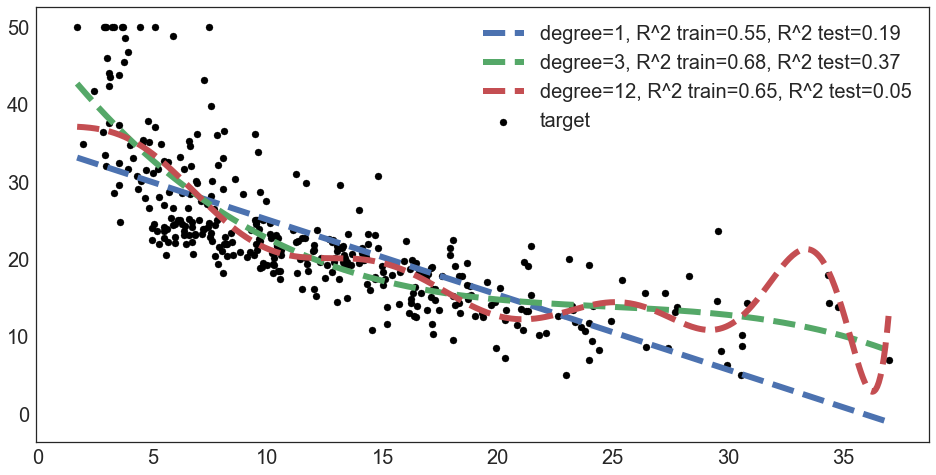

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#shuffle = ms.KFold(n_splits=5, shuffle=True)
x_train, x_test, y_train, y_test = ms.train_test_split(df_boston['LSTAT'], df_boston['target'], test_size=0.3, random_state=0)

plt.scatter(x_train, y_train, color='black')

x_pred = np.linspace(x_train.min(), x_train.max(), 500)

axis = plt.axis()
for degree in [1, 3, 12]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train.values.reshape(len(x_train), 1), y_train)
    
    train_score = model.score(x_train.values.reshape(len(x_train), 1), y_train)
    test_score = sm.r2_score(model.predict(x_test.values.reshape(len(x_test), 1)), y_test)

    y_pred = model.predict(x_pred.reshape(len(x_pred), 1))
    
    plt.plot(x_pred, y_pred, '--', label='degree={}, R^2 train={:.2f}, R^2 test={:.2f}'.format(degree, train_score, test_score))
    
plt.legend(loc='best');

### Learning and validation curves

[Learning Curves and Validation Curves in Scikit-Learn](http://sdsawtelle.github.io/blog/output/week6-andrew-ng-machine-learning-with-python.html)

/Users/yuri/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yuri/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


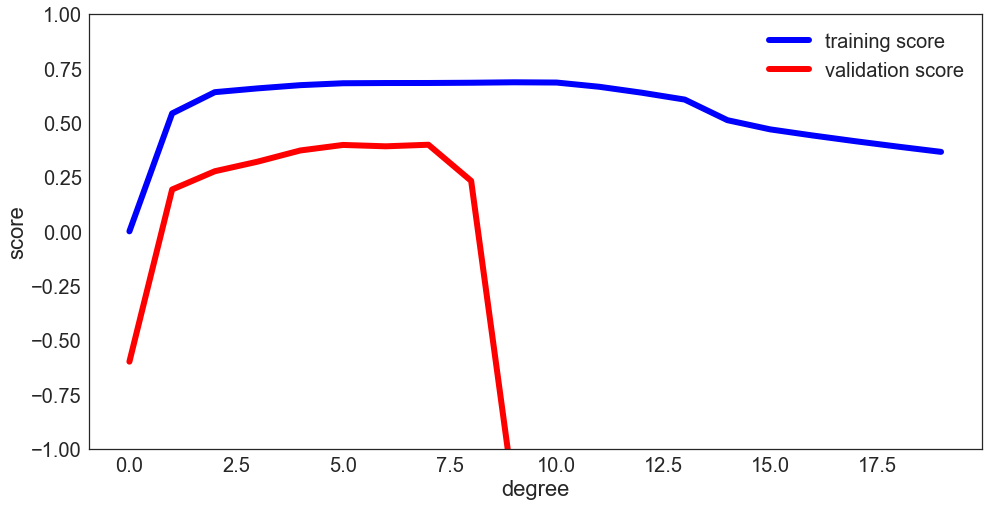

In [15]:
from sklearn.learning_curve import validation_curve

X = df_boston[['LSTAT']]
y = df_boston['target']

degree = np.arange(0, 20)

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
train_score, val_score = validation_curve(model, X, y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.mean(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.mean(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(-1, 1)
plt.xlabel('degree')
plt.ylabel('score');


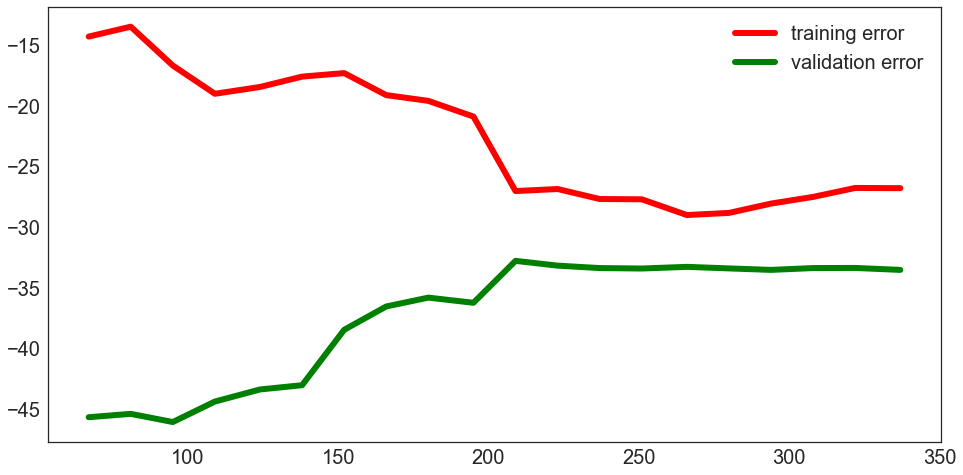

In [16]:
from sklearn.learning_curve import learning_curve

X = df_boston[['LSTAT']]
y = df_boston['target']

model = make_pipeline(PolynomialFeatures(4), LinearRegression())

train_sz, train_errs, cv_errs = learning_curve(model, X, y, train_sizes=np.linspace(0.2, 1, 20), scoring="neg_mean_squared_error") 
plt.plot(train_sz, np.mean(train_errs, 1), color='red', label='training error')
plt.plot(train_sz, np.mean(cv_errs, 1), color='green', label='validation error')
plt.legend(loc='best')

## Bias-Variance tradeoff
![](https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png)

[Understanding the Bias-Variance Tradeoff: An Overview](https://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html)

* Error due to Bias: Bias measures how far off in general these models' predictions are from the correct value.
* Error due to Variance: The variance is how much the predictions for a given point vary between different realizations of the model.

![](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

![](https://www.kdnuggets.com/wp-content/uploads/bias-variance-total-error.jpg)

## Logistic (logit) regression

Sigmoid
$$
f(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^{x}}
$$

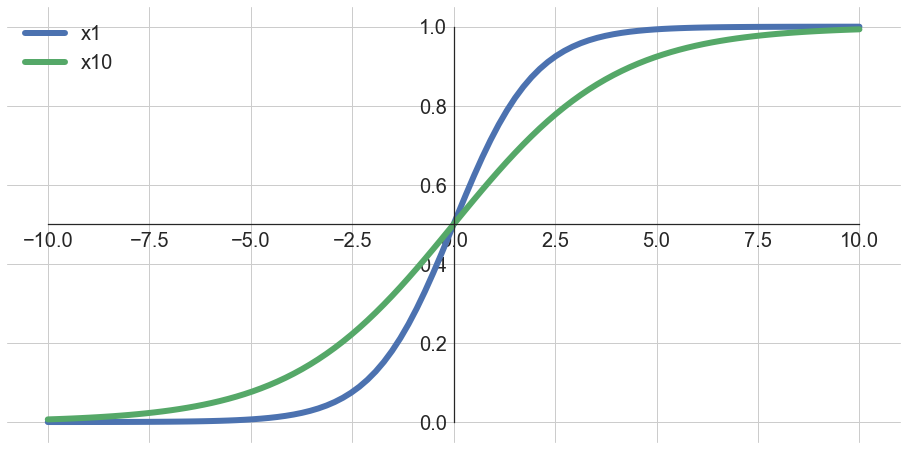

In [17]:
x = np.linspace(-10, 10, 100)
y1 = 1 / (1 + np.exp(-x))
y10 = 1 / (1 + np.exp(-0.5 * x))

ax = plt.subplot(111)
plt.plot(x, y1, label="x1")
plt.plot(x, y10, label="x10")
ax.legend(loc='best')
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.grid(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

In [18]:
wine = sd.load_wine()

print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [19]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [20]:
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

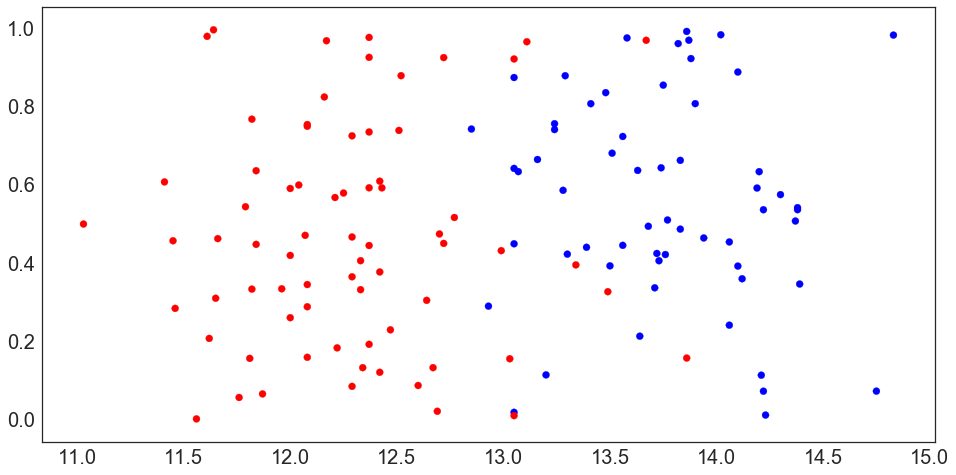

In [21]:
from sklearn.linear_model import LogisticRegression

df_wine01 = df_wine[df_wine['target'] != 2]

plt.scatter(df_wine01['alcohol'], y=np.random.rand(len(df_wine01)), color=['r' if t == 1 else 'b' for t in df_wine01['target']])

* A wine belongs to one of two classes
* If P=probability of class 1, then probability of class 2 = 1-P

$$
z = \beta^{T}{X}
$$

$$
\log \frac{p}{1-p}=z
\qquad\text{or}\qquad
p=\frac{1}{1+e^{-z}}
$$

$$
\frac{p}{1-p}\qquad\text{is odds ratio}
$$

Example:

In [22]:
def calc_p(x):
    beta0 = -13
    beta1 = 1

    z = beta1 * x + beta0

    return 1 / (1 + np.exp(-z))

print(calc_p(13))
print(calc_p(15))
print(calc_p(11))

0.5
0.880797077978
0.119202922022


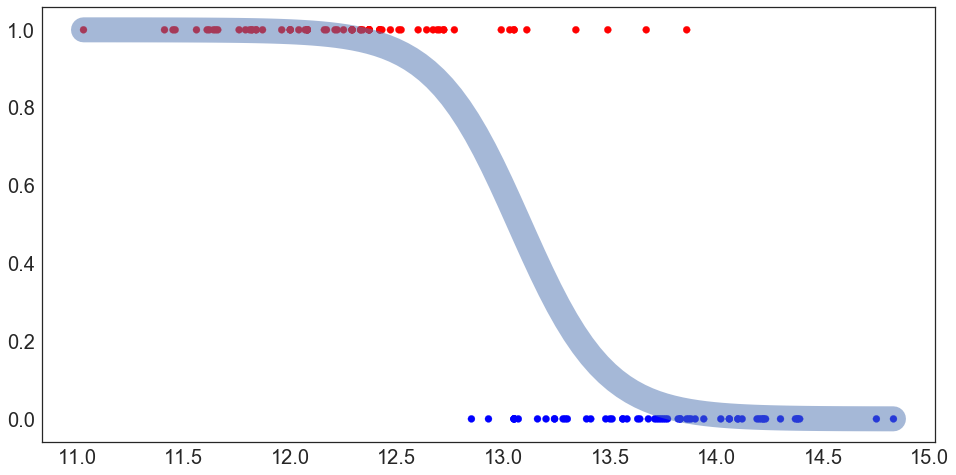

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e5)
X = df_wine01[['alcohol']]
y = df_wine01['target']
model.fit(X, y)

plt.scatter(X.iloc[:,0], y, color=['r' if t == 1 else 'b' for t in y])

x1 = np.linspace(df_wine01['alcohol'].min(), df_wine01['alcohol'].max(), 100)
z1 = x1 * model.coef_[0] + model.intercept_
y1 =  1 / (1 + np.exp(-z1))

plt.plot(x1, y1, alpha=0.5, linewidth=25.0)

## Classification errors

### [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
![](https://se.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60900/versions/13/screenshot.png)

Sensitivity (True Positive Rate)
$$
TPR = \frac{TP}{P} = \frac{TP}{TP + FN}
$$

Specificity (True Negative Rate)
$$
TNR = \frac{TN}{N} = \frac{TN}{TN + FP}
$$

Precision (Positive Predictive Value)
$$
PPV = \frac{TP}{TP + FP}
$$

Accuracy
$$
ACC = \frac{TP + TN}{P + N} = \frac{TP + TN}{TP + FP + TN + FN}
$$

In [24]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=0)
y_pred = model.fit(X_train, y_train).predict(X_test)
sm.confusion_matrix(y_test, y_pred)

array([[17,  0],
       [ 3, 13]])

### ROC curve

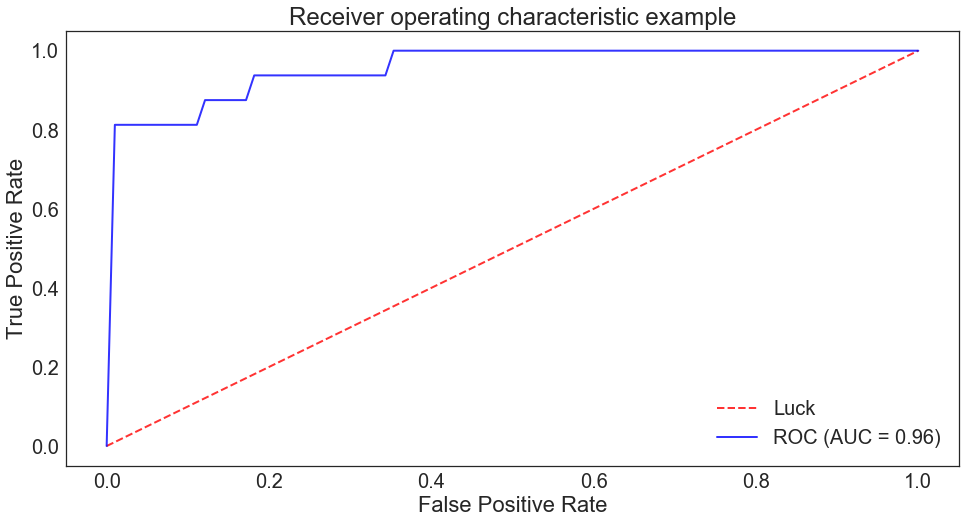

In [25]:
classifier = model

tprs = []
mean_fpr = np.linspace(0, 1, 100)

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=0)

prob = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr, tpr, thresholds = sm.roc_curve(y_test, prob[:, 1])
tprs.append(np.interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = sm.auc(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = sm.auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f)' % (mean_auc),
         lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [26]:
df_prob = pd.DataFrame(dict(prob=prob[:, 1], y=y_test.values))
df_0 = df_prob[df_prob['y'] == 0]
df_1 = df_prob[df_prob['y'] == 1]

ranges = np.linspace(0, 1, 11)

df_cut0 = pd.cut(df_0.prob, ranges)
df_cut1 = pd.cut(df_1.prob, ranges)

df_a0 = pd.DataFrame(dict(a=df_cut0.ravel().astype('str')))
df_a1 = pd.DataFrame(dict(a=df_cut1.ravel().astype('str')))

df_g0 = df_cut0.groupby(df_a0.a).count()
df_g1 = df_cut1.groupby(df_a1.a).count()

pd.DataFrame(dict(g0=df_g0, g1=df_g1)).fillna(0)

,g0,g1
"(0.0, 0.1]",8.0,0.0
"(0.3, 0.4]",1.0,0.0
"(0.4, 0.5]",0.0,1.0
"(0.8, 0.9]",0.0,1.0
"(0.9, 1.0]",0.0,5.0


## Unsupervised learning
### K-Means clustering

* Guess some cluster centers
* Repeat until converged
  - Assign points to the nearest cluster center
  - Set the cluster centers to the mean

In [29]:
iris = sd.load_iris()

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [30]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = pd.Categorical.from_codes(iris.target, ['setosa', 'versicolor', 'virginica'])
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


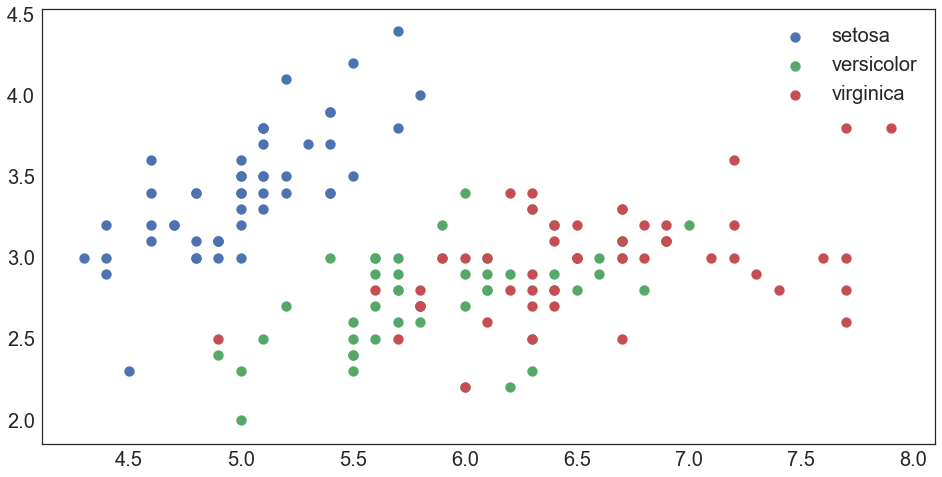

In [73]:
x, y = df_iris['sepal length (cm)'],  df_iris['sepal width (cm)']

for i, name in enumerate(df_iris['target'].cat.categories):
    cond = iris['target'] == i
    plt.scatter(x[cond], y[cond], marker='o', label=name, s=100)

plt.legend(numpoints=1)
plt.show()


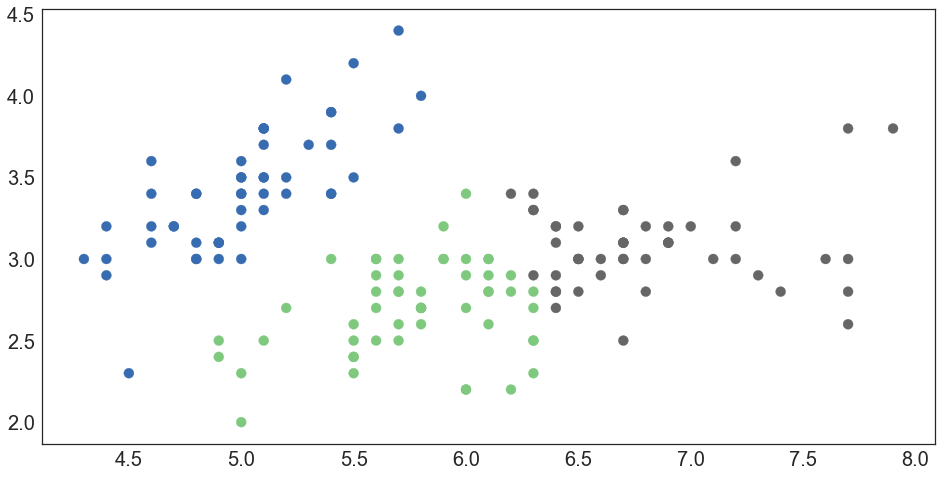

In [76]:
from sklearn.cluster import KMeans

labels = KMeans(3, random_state=0).fit_predict(df_iris[['sepal length (cm)', 'sepal width (cm)']])
plt.scatter(df_iris['sepal length (cm)'], df_iris['sepal width (cm)'], c=labels,
            s=100, cmap='Accent');

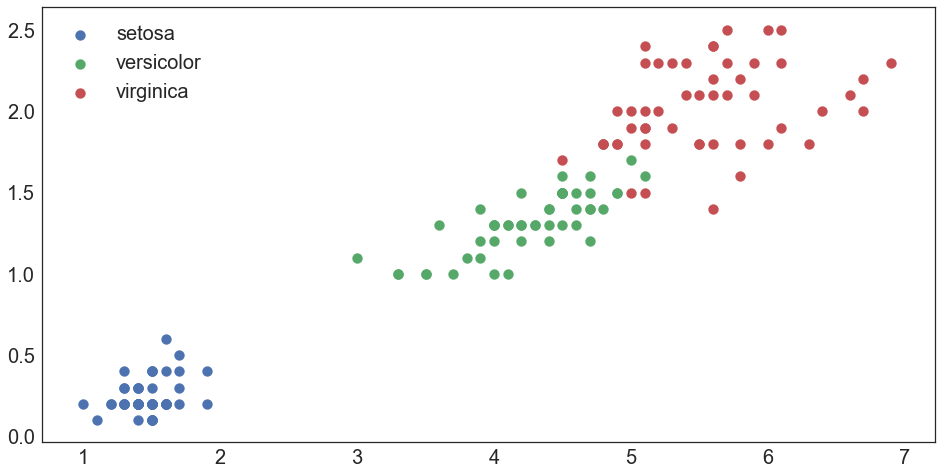

In [77]:
x, y = df_iris['petal length (cm)'],  df_iris['petal width (cm)']

for i, name in enumerate(df_iris['target'].cat.categories):
    cond = iris['target'] == i
    plt.scatter(x[cond], y[cond], marker='o', label=name, s=100)

plt.legend(numpoints=1)
plt.show()

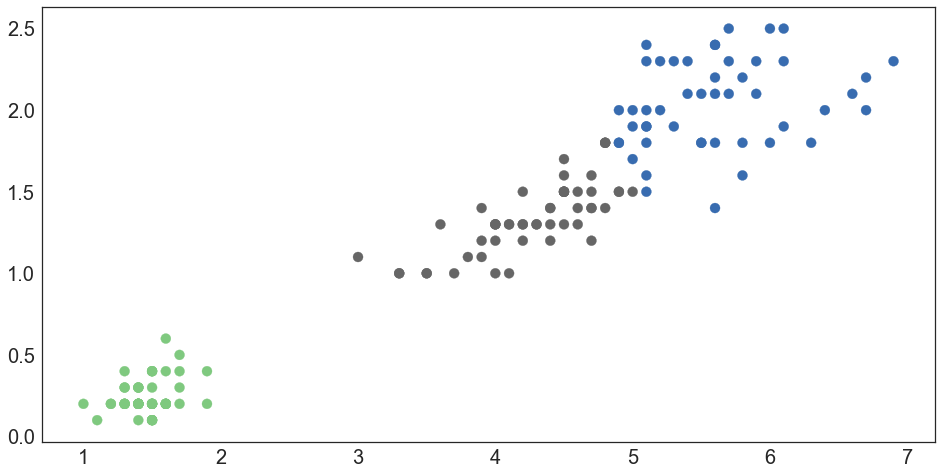

In [78]:
labels = KMeans(3, random_state=0).fit_predict(df_iris[['petal length (cm)', 'petal width (cm)']])
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=labels,
            s=100, cmap='Accent');